# 0.0 Imports

In [21]:
import pandas  as pd
import numpy   as np
import inflection
import seaborn as sns

## 0.1 Loading table

In [4]:
%%bigquery df_raw

SELECT * FROM gcp-concrete.gcp_concrete_table.gcp_concrete_table

Query is running:   0%|          |

Downloading:   0%|          |

In [5]:
df_raw.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28,15.42
1,152.0,178.0,139.0,168.0,18.0,944.0,695.0,28,36.35
2,336.5,0.0,0.0,181.9,3.4,985.8,816.8,28,44.87
3,321.0,164.0,0.0,190.0,5.0,870.0,774.0,28,57.21
4,385.0,0.0,136.0,158.0,20.0,903.0,768.0,28,55.55


# 1.0 Data Description

In [7]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [9]:
# Mudar para snake case
old_cols = ['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

snake_case = lambda x: inflection.underscore(x)

new_cols = list( map(snake_case, old_cols))
df1.columns = new_cols

In [10]:
df1.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'cs_m_pa'],
      dtype='object')

## 1.2 Data Dimensions

In [11]:
print("Número de linhas: {}".format(df1.shape[0]))
print("Número de colunas: {}".format(df1.shape[1]))

Número de linhas: 1030
Número de colunas: 9


## 1.3 Data Types

In [12]:
df1.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   Int64
cs_m_pa             float64
dtype: object

## 1.4 Check NA

In [13]:
df1.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
cs_m_pa             0
dtype: int64

## 1.5 Descriptive Statistical

In [17]:
# Apenas variáveis numéricas
# Central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(np.std)).T
d2 = pd.DataFrame(df1.apply(min)).T
d3 = pd.DataFrame(df1.apply(max)).T
d4 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,cement,102.00,540.0,438.00,281.167864,272.900,104.455621,0.509481,-0.520652
1,slag,0.00,359.4,359.40,73.895825,22.000,86.237448,0.800717,-0.508175
2,flyash,0.00,200.1,200.10,54.188350,0.000,63.965930,0.537354,-1.328746
3,water,121.80,247.0,125.20,181.567282,185.000,21.343850,0.074628,0.122082
4,superplasticizer,0.00,32.2,32.20,6.204660,6.400,5.970941,0.907203,1.411269
5,coarseaggregate,801.00,1145.0,344.00,972.918932,968.000,77.716200,-0.040220,-0.599016
6,fineaggregate,594.00,992.6,398.60,773.580485,779.500,80.137050,-0.253010,-0.102177
7,age,1.00,365.0,364.00,45.662136,28.000,63.139239,3.269177,12.168989
8,cs_m_pa,2.33,82.6,80.27,35.817961,34.445,16.697630,0.416977,-0.313725


# 2.0 Feature Engineering

In [18]:
df2 = df1.copy()

# 3.0 EDA 

In [19]:
df3 = df2.copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='cs_m_pa'>

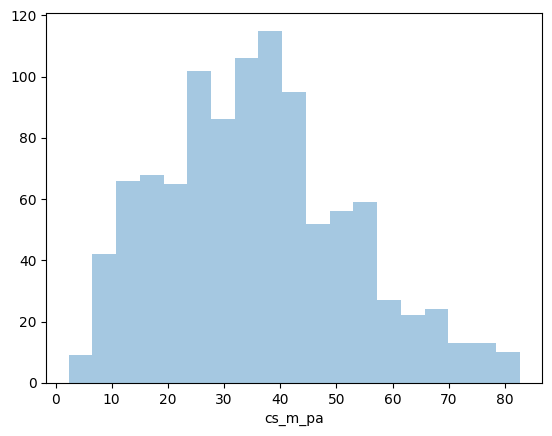

In [24]:
sns.distplot( df3['cs_m_pa'], kde=False )

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'flyash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarseaggregate'}>],
       [<AxesSubplot:title={'center':'fineaggregate'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cs_m_pa'}>]], dtype=object)

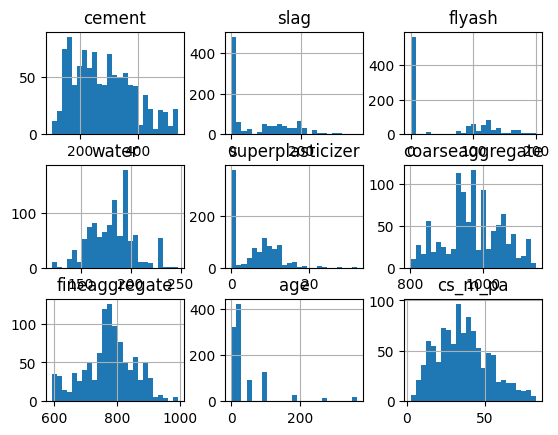

In [30]:
df3.hist( bins=25 )

# 4.0 Data Preparation

In [22]:
df4 = df3.copy()

In [ ]:
sns.distplot( df4['sales'], kde=False )